In [ ]:
import numpy as np
#first of all like always I shall import the stuff
import matplotlib.pyplot as plt
# tensorflow library has been used for creating layers in this neural network
import tensorflow as tf
# from tf.keras.layers import Dense, Input
# from tf.keras import Sequential
# from tf.keras.losses import MeanSquaredError, BinaryCrossentropy
# from tf.keras.activations import sigmoid
#logging ->  numpy as np-> matplotlib.pyplot as plt -> tensorflow as tf
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

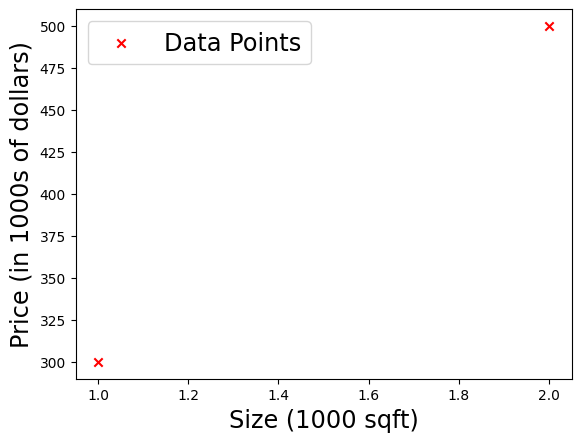

In [ ]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)
# this is the training set
fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')

plt.show()

In [ ]:
# so this is the first line of code that I am going to learn for tensor flow
# linear_layer which is f_wb = w.x + b
# tf -> keras -> layers -> Dense (units = number of layers, activation which is the output type of layer)
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', )
# just a basic example of a layer

In [ ]:
linear_layer.get_weights()

#here I try to check the weights which should be empty as no data set has been given to it

[]

In [ ]:
# here lets give it some training set
# allow it to compute weight for data 1
# use the name of the layer and along with that in the paranthesis write the data which you want to compute
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)


In [ ]:

w, b= linear_layer.get_weights()
# as we can see this is the same as above
print(f"w = {w}, b={b}")

w = [[-0.60035944]], b=[0.]


In [ ]:
set_w = np.array([[200]])
set_b = np.array([100])
# lets start doing our regression thing and set some initial values for w and b
# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
# so another thing that I just learnt was that the linear_layer is just going to apply the formula and not calculate the weights for us like scikit
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [ ]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
# JUST TO  check we compare the linear_layer == tf.keras.layers.Dense(units = , activation = )
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[100.]], shape=(1, 1), dtype=float32)
[[100.]]


In [ ]:
# now lets check it for the whole of the data set along with the other values of w and b
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b
print(prediction_tf)
print(prediction_np)

tf.Tensor(
[[ 100.]
 [ 300.]
 [ 500.]
 [ 700.]
 [ 900.]
 [1100.]], shape=(6, 1), dtype=float32)
[[ 100.]
 [ 300.]
 [ 500.]
 [ 700.]
 [ 900.]
 [1100.]]


In [ ]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [ ]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

# remember this is crucial you hadnt done this
# this is actually a smart way to iterate for only those items which have a condition

array([3., 4., 5.], dtype=float32)

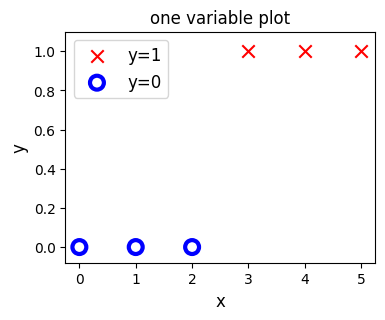

In [ ]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors="blue",lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

# ok so here the actual thing is going to start First we create a sequence

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:


logistic_layer = model.get_layer('L1')
# so here we see that we can get a layer by
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[2.]] [-4.5]
(1, 1) (1,)


In [ ]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [ ]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = tf.keras.activations.sigmoid(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 [==============================] - 0s 32ms/step
[[0.01098694]]
tf.Tensor([[0.01098694]], shape=(1, 1), dtype=float64)
